In [9]:
import pandas as pd

alldata = pd.read_csv('./dataset/AllData.csv')
data_part1 = pd.read_csv('./dataset/Data_part1.csv')
data_part1Stage2 = pd.read_csv('./dataset/Data_part1Stage2.csv')
data_part2 = pd.read_csv('./dataset/Data_part2.csv')
data_part2Stage2 = pd.read_csv('./dataset/Data_part2Stage2.csv')
data_part3 = pd.read_csv('./dataset/Data_part3.csv')
data_part3Stage2 = pd.read_csv('./dataset/Data_part3Stage2.csv')
data_part4 = pd.read_csv('./dataset/Data_part4.csv')
data_part4Stage2 = pd.read_csv('./dataset/Data_part4Stage2.csv')
data_part5Stage2 = pd.read_csv('./dataset/Data_part5Stage2.csv')

/var/folders/zw/fys05h7s5tj5gwq3kvs2x7gw0000gn/T/ipykernel_34307/3580840032.py:3: DtypeWarning: Columns (7,8,9,10,11,13,16,18,19,26,27,28,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,70,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,96,98,99,101,102,103,104,105,106,107,108,109,110,111,112,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,139,140,145,146,147,148,149,150,151,152,153,154,155,156,169) have mixed types. Specify dtype option on import or set low_memory=False.
  alldata = pd.read_csv('./dataset/AllData.csv')
/var/folders/zw/fys05h7s5tj5gwq3kvs2x7gw0000gn/T/ipykernel_34307/3580840032.py:4: DtypeWarning: Columns (8,9,11,12,14,15,16,17,19,21,23,24,31,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,79,93,104,113,117,118,119,120,121,122,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,1

In [10]:
all_dataset_names = [alldata, data_part1, data_part1Stage2, data_part2, data_part2Stage2, data_part3, data_part3Stage2, data_part4, data_part4Stage2, data_part5Stage2]
complete_dataset = pd.concat(all_dataset_names, ignore_index=True, sort=False).drop(columns=['Unnamed: 0'])
complete_dataset

,alias,assigned_to,assigned_to_detail,blocks,cc,cc_detail,cf_backlog,cf_blocking_20,cf_blocking_fennec,cf_blocking_seamonkey21,...,cf_status_seamonkey243,cf_status_thunderbird25,cf_status_thunderbird_39,cf_status_thunderbird_40,cf_status_thunderbird_51,cf_tracking_firefox21,cf_tracking_thunderbird_esr45,cf_status_thunderbird_58,cf_tracking_seamonkey255,cf_status_seamonkey238
0,NaN,nobody@mozilla.org,"{'email': 'nobody@mozilla.org', 'real_name': '...","10276, 104166","['amanforindia@gmail.com', 'andrewm715+bugzill...","[{'email': 'amanforindia@gmail.com', 'real_nam...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,nobody@mozilla.org,"{'email': 'nobody@mozilla.org', 'real_name': '...",36557,"['klonos@gmail.com', 'leif@ogre.com', 'martin....","[{'email': 'klonos@gmail.com', 'real_name': 'k...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,nobody@mozilla.org,"{'email': 'nobody@mozilla.org', 'real_name': '...","76449, 250163","['ben.bucksch@beonex.com', 'blog@tessarakt.de'...","[{'email': 'ben.bucksch@beonex.com', 'real_nam...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,ben.bucksch@beonex.com,"{'email': 'ben.bucksch@beonex.com', 'real_name...",913768,"['3.14@piology.org', 'aha@pinknet.cz', 'alecf@...","[{'email': '3.14@piology.org', 'real_name': ""B...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,nobody@mozilla.org,"{'email': 'nobody@mozilla.org', 'real_name': '...",171467,"['acelists@atlas.sk', 'alex@mozillazine.org', ...","[{'email': 'acelists@atlas.sk', 'real_name': '...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65560,NaN,nobody@mozilla.org,"{'email': 'nobody@mozilla.org', 'real_name': '...",1467214,[],[],NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65561,NaN,nobody@mozilla.org,"{'email': 'nobody@mozilla.org', 'real_name': '...",1378418,"['mmucci@mozilla.com', 'pbrosset@mozilla.com']","[{'email': 'mmucci@mozilla.com', 'real_name': ...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65562,NaN,nobody@mozilla.org,"{'email': 'nobody@mozilla.org', 'real_name': '...",NaN,['jruderman@gmail.com'],"[{'email': 'jruderman@gmail.com', 'real_name':...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65563,NaN,nobody@mozilla.org,"{'email': 'nobody@mozilla.org', 'real_name': '...",1467214,[],[],NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Average percentage of words per summary that are stop words: 22.78%


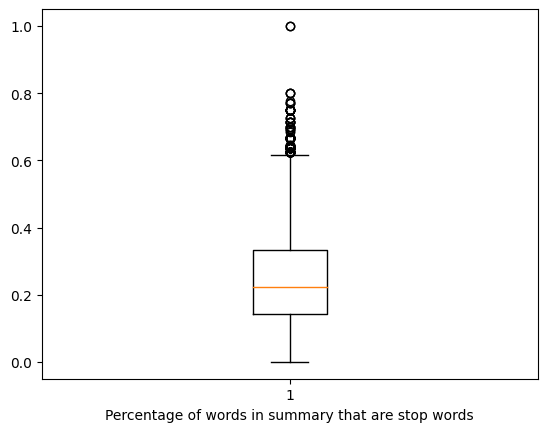

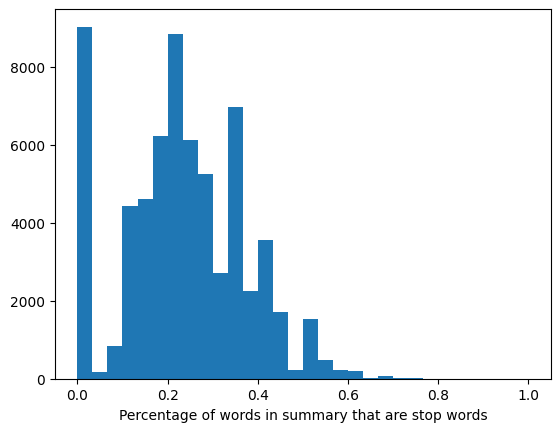

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import matplotlib.pyplot as plt

#Start Exploratory Data Analysis Here


# --- -- - get the proportion of english stop words per summary - -- ---
summaries = complete_dataset['summary'].to_list()
stop_word_proportions = []

# **SHOULD BE HANDLING NON-ENGLISH WORDS SOMEHOW** (without discarding important non-dictionary words)

for summary in summaries:
    vectorizer = CountVectorizer()
    vectorizer.fit_transform([summary])
    summary_tokens = vectorizer.get_feature_names_out()
    num_stop_words = sum((token in ENGLISH_STOP_WORDS) for token in summary_tokens)
    stop_word_proportions.append(num_stop_words / len(summary_tokens))

print("Average percentage of words per summary that are stop words: {:.2f}%".format((sum(stop_word_proportions) / len(summaries)) * 100))
plt.boxplot(stop_word_proportions)
plt.xlabel('Percentage of words in summary that are stop words')
plt.show()
plt.hist(stop_word_proportions, bins=30)
plt.xlabel('Percentage of words in summary that are stop words')
plt.show()